In [18]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import plot_confusion_matrix,accuracy_score


In [2]:
X,y = load_iris(return_X_y=True)

In [3]:
(X.shape,y.shape)


((150, 4), (150,))

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [5]:
clf = KNeighborsClassifier(n_neighbors=1)

In [6]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [7]:
ypred = clf.predict(X_test)

In [8]:
print("accuary score: ",accuracy_score(y_test,ypred,normalize=True))

accuary score:  1.0


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


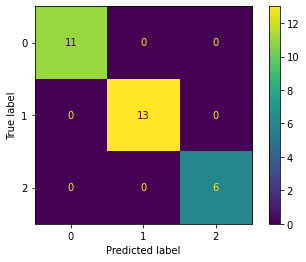

In [9]:

plot_confusion_matrix(clf, X_test, y_test)

candidate hyperparameters

In [10]:
cd = {
    "n_neighbors":[1,2,3,4,5],
}

In [11]:
cv = GridSearchCV(estimator=clf,param_grid=cd,n_jobs=-1)


In [12]:
cv.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})

In [13]:
best = cv.best_estimator_

best parameters:

In [14]:
print(cv.best_params_)

{'n_neighbors': 3}


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


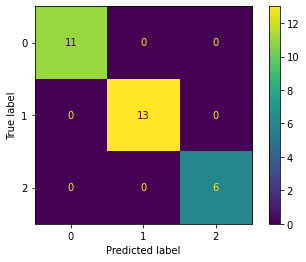

In [15]:
plot_confusion_matrix(best, X_test, y_test)

In [16]:
best_ypred = best.predict(X_test)

In [17]:
print("best model accuracy score:" ,accuracy_score(y_test,best_ypred,normalize=True))

best model accuracy score: 1.0


In [24]:
x = cross_val_score(clf,X,y,cv=10)

In [25]:
import numpy as np

